In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Decision Tree (결정 트리)

*   Classification과 Regression 둘다 사용할 수 있는

*   지도 학습 (Supervised learning)
*   데이터의 특성으로부터 추론된 결정 규칙 (decision rule)을 기반으로 입력 데이터의 결과를 예측
*   if-then-else의 원리를 따름.
*   트리의 깊이가 깊을 수록 복잡한 모델

* Dicision Tree는 변수들의 규칙을 학습하기 때문에 전처리에 크게 영향을 받지 않는다.


In [1]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

# Classification

DecisionTreeClassifier()

*   두 개의 배열 X, y를 input으로 한다.
*   X = [n_samples, n_features] 크기의 데이터 특성 배열
*   y = [n_samples] 크기의 데이터 정답 배열

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

bc_X = cancer.data
bc_y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(bc_X, bc_y, test_size = 0.2)


In [13]:
# model = tree.DecisionTreeClassifier()
model = tree.DecisionTreeClassifier(max_depth= 3)
model.fit(X_train, y_train)

# model.predict()             # predict : 주어진 값의 class가 무엇인지 반환
# model.predict_proba()       # predict_proba : 주어진 값이 확률적으로 어디에 가까운가를 반환


DecisionTreeClassifier()

In [4]:
model = DecisionTreeClassifier()

cross_val_score(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.90350877, 0.92105263, 0.92982456, 0.93859649, 0.89380531])

In [5]:
# visualize

model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

# r = tree.export_text(decision_tree = model, feature_names = cancer.feature_names)
r = tree.export_text(decision_tree = model)

print(r)


|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_18 <= 0.01
|   |   |   |--- class: 0
|   |   |--- feature_18 >  0.01
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_26 <= 0.19
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_26 >  0.19
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_5 <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.06
|   |   |   |   |   |--- feature_27 <= 0.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_27

[Text(0.609375, 0.9375, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.375, 0.8125, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.171875, 0.6875, 'X[18] <= 0.009\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.140625, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.203125, 0.5625, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.4375, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.3125, 'X[26] <= 0.195\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.09375, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3125, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.21875, 0.1875, 'X[21] <= 33.56\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1875, 0.0625

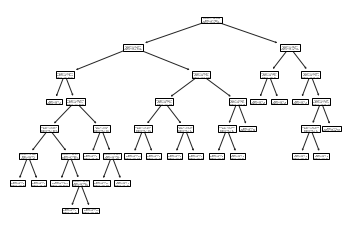

In [6]:
tree.plot_tree(model)

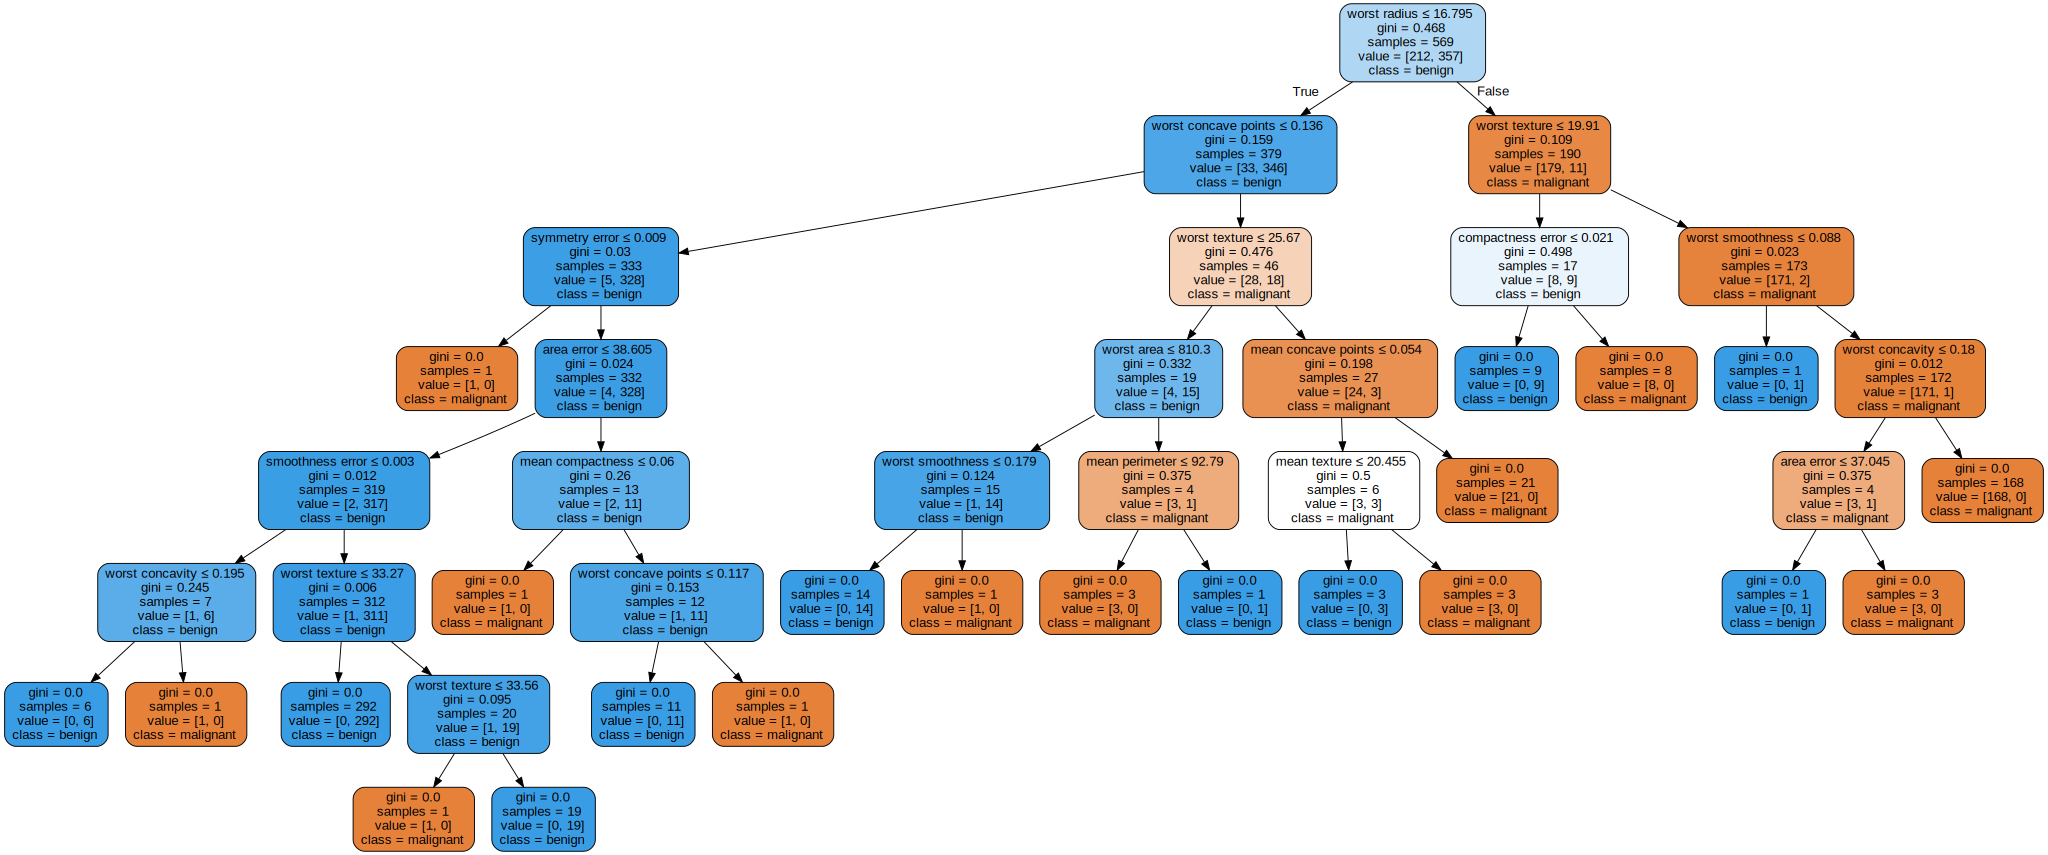

In [8]:
dot_data = tree.export_graphviz(decision_tree= model,
                                feature_names = cancer.feature_names,
                                class_names = cancer.target_names,
                                filled = True, rounded = True,
                                special_characters = True)

graph = graphviz.Source(dot_data)
graph

# print(" 판단 기준 엔트로피 값으로 gini 계수 사용 \n")
# print(" 현재 class \n")

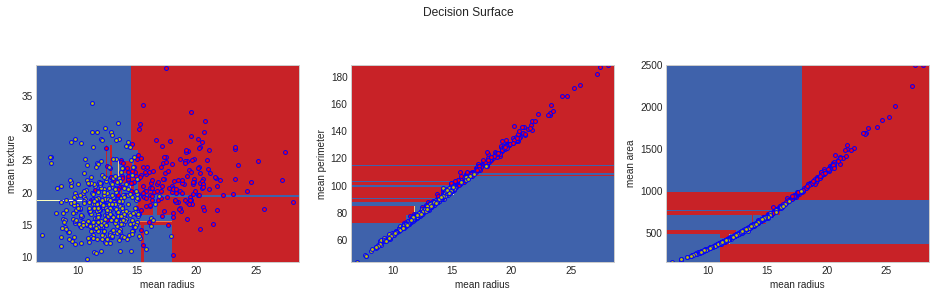

In [9]:
# 결정 경계 시각화

n_classes = 2   # class 수 체크
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize = (16,8))

plt.suptitle('Decision Surface')

for pair_idx, pair in enumerate([[0,1], [0,2], [0,3]]):   # 결정 경계 수 체크

  X = cancer.data[:, pair]
  y = cancer.target

  model = DecisionTreeClassifier()
  model.fit(X, y)

  plt.subplot(2, 3, pair_idx + 1)

  x_min = X[:, 0].min() - 0.5
  x_max = X[:, 0].max() + 0.5
  y_min = X[:, 1].min() - 0.5
  y_max = X[:, 1].max() + 0.5

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    # print(i)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, label = cancer.target_names[i],
                cmap = plt.cm.RdYlBu, edgecolor = 'b', s = 15)


# Regression

DecisionTreeRegressor()



In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

dia_X = diabetes.data
dia_y = diabetes.target

# X_train, X_test, y_train, y_test = train_test_split(dia_X, dia_y, test_size = 0.2)

In [12]:
model = DecisionTreeRegressor()

cross_val_score(
    estimator = model,
    X = dia_X, y = dia_y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([-0.35068554, -0.05288444, -0.01889324, -0.09481504, -0.10698646])

In [13]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

cross_val_score(
    estimator = model,
    X = dia_X, y = dia_y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([-0.37169907,  0.07714905, -0.19511847, -0.02721504, -0.24574459])

In [14]:
# 시각화를 해보면 이런 데이터는 decision tree로 회귀하기 어려운 데이터라는 것을 알 수 있음.

model = DecisionTreeRegressor()
model.fit(dia_X, dia_y)

DecisionTreeRegressor()

In [15]:
r = tree.export_text(model)
print(r)

|--- feature_8 <= -0.00
|   |--- feature_2 <= 0.01
|   |   |--- feature_6 <= 0.02
|   |   |   |--- feature_4 <= 0.06
|   |   |   |   |--- feature_1 <= 0.00
|   |   |   |   |   |--- feature_3 <= -0.03
|   |   |   |   |   |   |--- feature_0 <= -0.05
|   |   |   |   |   |   |   |--- feature_3 <= -0.09
|   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |--- feature_3 >  -0.09
|   |   |   |   |   |   |   |   |--- feature_3 <= -0.05
|   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.07
|   |   |   |   |   |   |   |   |   |   |--- value: [200.00]
|   |   |   |   |   |   |   |   |   |--- feature_3 >  -0.07
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_3 >  -0.05
|   |   |   |   |   |

[Text(0.5306739237184441, 0.9761904761904762, 'X[8] <= -0.004\nsquared_error = 5929.885\nsamples = 442\nvalue = 152.133'),
 Text(0.30562330950540956, 0.9285714285714286, 'X[2] <= 0.006\nsquared_error = 3240.821\nsamples = 218\nvalue = 109.986'),
 Text(0.20749211102524473, 0.8809523809523809, 'X[6] <= 0.021\nsquared_error = 2143.968\nsamples = 171\nvalue = 96.31'),
 Text(0.11830242143225142, 0.8333333333333334, 'X[4] <= 0.063\nsquared_error = 2856.847\nsamples = 87\nvalue = 108.805'),
 Text(0.09131890777949511, 0.7857142857142857, 'X[1] <= 0.003\nsquared_error = 2496.899\nsamples = 85\nvalue = 105.682'),
 Text(0.04353426069036579, 0.7380952380952381, 'X[3] <= -0.035\nsquared_error = 2955.72\nsamples = 39\nvalue = 118.846'),
 Text(0.023183925811437404, 0.6904761904761905, 'X[0] <= -0.051\nsquared_error = 2357.959\nsamples = 21\nvalue = 100.429'),
 Text(0.00824317362184441, 0.6428571428571429, 'X[3] <= -0.092\nsquared_error = 2049.0\nsamples = 8\nvalue = 133.5'),
 Text(0.00618238021638330

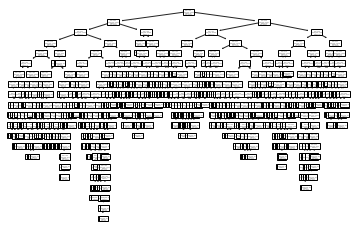

In [16]:
tree.plot_tree(model)

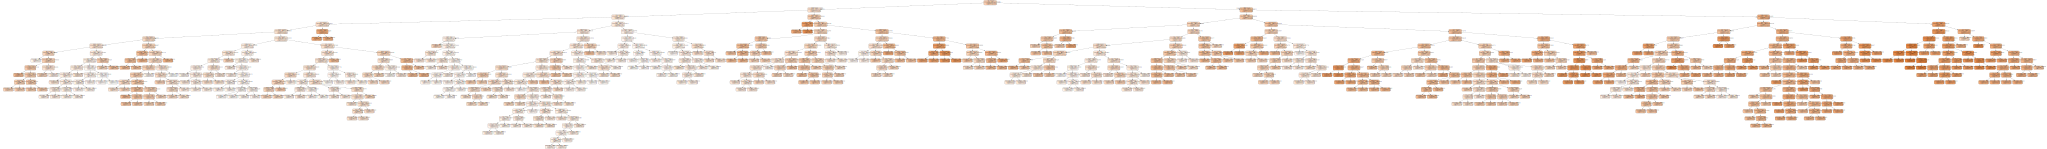

In [18]:
dot_data = tree.export_graphviz(decision_tree = model,
                                feature_names = diabetes.feature_names,
                                filled = True, rounded = True,
                                special_characters = True)

graph = graphviz.Source(dot_data)
graph

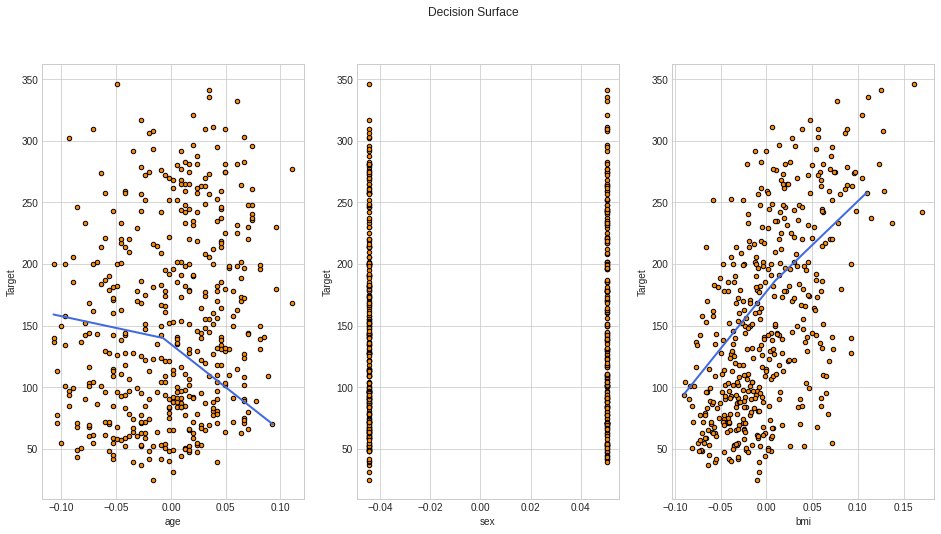

In [20]:
# 회귀식 시각화

plt.figure(figsize = (16,8))

plt.suptitle('Decision Surface')

for pair_idx, pair in enumerate([0, 1, 2]):   # 결정 경계 수 체크

  X = diabetes.data[:, pair].reshape(-1,1)
  y = diabetes.target

  model = DecisionTreeRegressor()
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pair_idx + 1)
  plt.scatter(X, y, s = 20, edgecolors = 'k',
              c = 'darkorange', label = 'data')
  plt.plot(X_test, predict, color = 'royalblue', linewidth = 2)

  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target')
